# Homework 2
<span style="font-size: 1.5em;">**CDS-101 (Spring 2017)**</span>

<span style="font-size: 1.5em;">**Name:** Mike Ninov</span>

In [1]:
# Set the location for R packages
.libPaths(new = "~/Rlibs")
# Load the Tidyverse packages
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# Load the nycflights dataset
flights <- read_csv("nycflights13.csv")

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  day = col_integer(),
  dep_time = col_integer(),
  sched_dep_time = col_integer(),
  dep_delay = col_double(),
  arr_time = col_integer(),
  sched_arr_time = col_integer(),
  arr_delay = col_double(),
  carrier = col_character(),
  flight = col_integer(),
  tailnum = col_character(),
  origin = col_character(),
  dest = col_character(),
  air_time = col_double(),
  distance = col_double(),
  hour = col_double(),
  minute = col_double(),
  time_hour = col_datetime(format = "")
)


**Question 1**
In order to produce a vector containing all integeres from 1-100, we can simply use seq(1,100,1).
In order to find which integers are NOT ! divisible by 2,3,7 we use the ! and %% operators.

In [3]:
v <- seq(1,100,1)
v[!(!v%%2) + (!v%%3) + (!v%%7)]

[1]  1  5 11 13 17 19 23 25 29 31 37 41 43 47 53 55 59 61 65 67 71 73 79 83 85
[26] 89 95 97

**Question 2a**
Find all flights that flew to IAH or HOU

In [4]:
houston_dest <- filter(flights, dest == 'IAH' | dest == 'HOU')
print(houston_dest)

# A tibble: 9,313 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      623            627        -4      933            932
4   2013     1     1      728            732        -4     1041           1038
5   2013     1     1      739            739         0     1104           1038
6   2013     1     1      908            908         0     1228           1219
7   2013     1     1     1028           1026         2     1350           1339
8   2013     1     1     1044           1045        -1     1352           1351
9   2013     1     1     1114            900       134     1447           1222
10  2013     1     1     1205           1200         5     1503           1505
# ... with 9,303 more rows, a

**Question 2b** Find all fligths operated by United, American, or Delta.

In [5]:
carrier_triad <- filter(flights, carrier == 'UA' | carrier == 'AA' | carrier == 'DL')
print(carrier_triad)

# A tibble: 139,504 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      554            600        -6      812            837
5   2013     1     1      554            558        -4      740            728
6   2013     1     1      558            600        -2      753            745
7   2013     1     1      558            600        -2      924            917
8   2013     1     1      558            600        -2      923            937
9   2013     1     1      559            600        -1      941            910
10  2013     1     1      559            600        -1      854            902
# ... with 139,494 more row

**Question 2c** Find all flights delayed by at least 1 hour, but made it up over 30 minutes in flight.

In [6]:
delay_hour_makeup <- filter(flights, dep_delay >= 60, dep_delay-arr_delay > 30)
print(delay_hour_makeup)

# A tibble: 1,844 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1     2205           1720       285       46           2040
2   2013     1     1     2326           2130       116      131             18
3   2013     1     3     1503           1221       162     1803           1555
4   2013     1     3     1839           1700        99     2056           1950
5   2013     1     3     1850           1745        65     2148           2120
6   2013     1     3     1941           1759       102     2246           2139
7   2013     1     3     1950           1845        65     2228           2227
8   2013     1     3     2015           1915        60     2135           2111
9   2013     1     3     2257           2000       177       45           2224
10  2013     1     4     1917           1700       137     2135           1950
# ... with 1,834 more rows, a

**Question 2d** Find all flights between midnight and 6 AM inclusive.

In [7]:
redeye <- filter(flights, dep_time == 2400 |dep_time <=600)
print(redeye)

# A tibble: 9,373 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 9,363 more rows, a

**Question 3** Convert dep_time and sched_dep_tim to a more convenient representation of number of minutes since midnight.

In [8]:
time_x <- mutate(flights,dep_time=(dep_time %/% 100)*60 + (dep_time %%100), sched_dep_time=(sched_dep_time %/% 100)*60 + (sched_dep_time %% 100))
print(time_x)

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <dbl>          <dbl>     <dbl>    <int>          <int>
1   2013     1     1      317            315         2      830            819
2   2013     1     1      333            329         4      850            830
3   2013     1     1      342            340         2      923            850
4   2013     1     1      344            345        -1     1004           1022
5   2013     1     1      354            360        -6      812            837
6   2013     1     1      354            358        -4      740            728
7   2013     1     1      355            360        -5      913            854
8   2013     1     1      357            360        -3      709            723
9   2013     1     1      357            360        -3      838            846
10  2013     1     1      358            360        -2      753            745
# ... with 336,766 more row

**Question 4** Compare air_time with arr_time - dep_time. What do you expect to see? What do you see? What do you need to do to fix it?

I expect to see an error because air_time is a <dbl> double, and arr_time & dep_time are <int> integers. The arr_time is a 24 hour time format, but dep_time is calcuated with repect to midnight. When you attempt arr_time-dep_time, your answer would be wrong.

In order to fix this problem, one solution would be to convert arr_time & dep_time into a standardized time format.

In [18]:
mutate(flights,dep_time = (dep_time %/% 100) * 60 + (dep_time %% 100), sched_dep_time = (sched_dep_time %/% 100) * 60 + (sched_dep_time %% 100),
arr_time = (arr_time %/% 100) * 60 + (arr_time %% 100), sched_arr_time = (sched_arr_time %/% 100) * 60 + (sched_arr_time %% 100)) %>%
transmute((arr_time - dep_time) %% (60*24) - air_time)

(arr_time - dep_time)%%(60 * 24) - ai...
1       -34                                    
2       -30                                    
3        61                                    
4        77                                    
5        22                                    
6       -44                                    
7        40                                    
8        19                                    
9        21                                    
10      -23                                    
11       22                                    
12       17                                    
13     -139                                    
14     -156                                    
15      -35                                    
16       19                                    
17     -162                                    
18       19                                    
19       23                                    
20       16                                    
21      -40                                    
22       34                                    
23       20                                    
24       23                                    
25       14                                    
26      -20                                    
27     -152                                    
28       17                                    
29       82                                    
30       18                                    
⋮      ⋮                                       
336747   15                                    
336748   35                                    
336749  -93                                    
336750   16                                    
336751   18                                    
336752 -148                                    
336753   21                                    
336754   18                                    
336755   24                                    
336756   19                                    
336757   21                                    
336758   55                                    
336759   35                                    
336760  -47                                    
336761  -32                                    
336762   16                                    
336763 -159                                    
336764   21                                    
336765   25                                    
336766   13                                    
336767   15                                    
336768   17                                    
336769   19                                    
336770   20                                    
336771   NA                                    
336772   NA                                    
336773   NA                                    
336774   NA                                    
336775   NA                                    
336776   NA

**Question 5a** Consider number of cancelled flights. Deterimine the definition of a flight cancellation.
As seen above, there are no flights that arrived but did not depart, so we can just use the !is.na(dep_delay)

In [19]:
group_by(flights, departed = !is.na(dep_delay), arrived = !is.na(arr_delay)) %>%
summarise(n=n())

departed arrived n     
1 FALSE    FALSE     8255
2  TRUE    FALSE     1175
3  TRUE     TRUE   327346

**Question 5b** Find the pattern of cancelled flights in relation to average delay. The canx/avg_delay shows a strong correlation between cancellations and delay; if one is high then the other is likely to be as well.

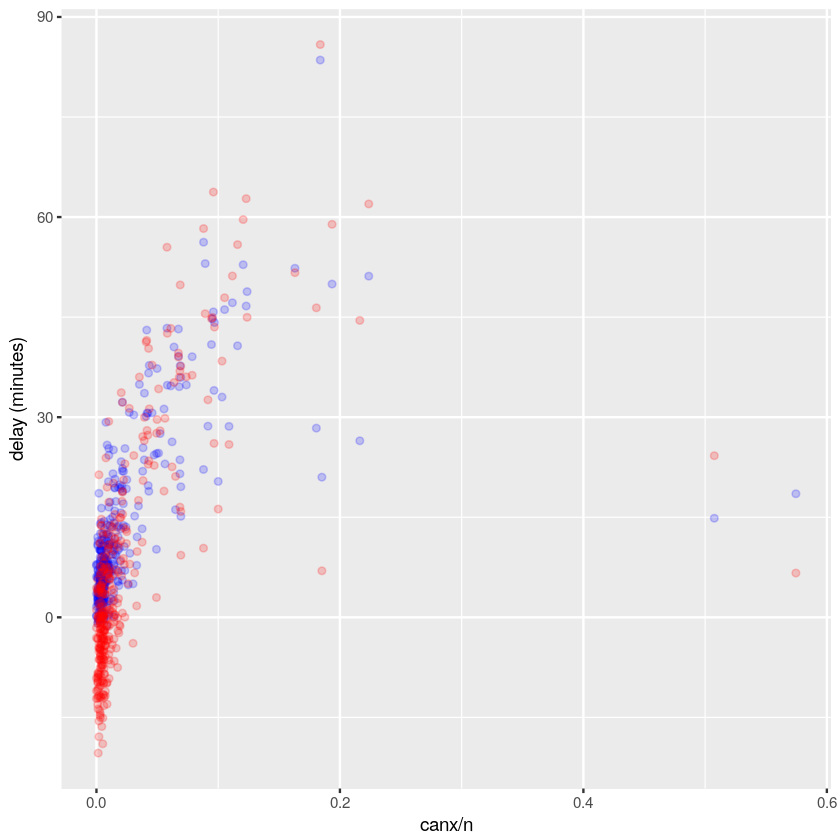

In [20]:
mutate(flights,dep_date = lubridate::make_datetime(year, month, day)) %>%
group_by(dep_date) %>%
summarise(canx = sum(is.na(dep_delay)), n=n(), mean_dep_delay = mean(dep_delay,na.rm=TRUE), mean_arr_delay = mean(arr_delay,na.rm=TRUE))%>%
ggplot(aes(x=canx/n)) + geom_point(aes(y=mean_dep_delay), color='blue', alpha=0.2) +
geom_point(aes(y=mean_arr_delay), color='red', alpha=0.2) + ylab('delay (minutes)')

**Question 6** What time of day should you fly if want to avoid delays? You would want to avoid flying late at night as the flight delays of the day accumilate into more delays in the evening.

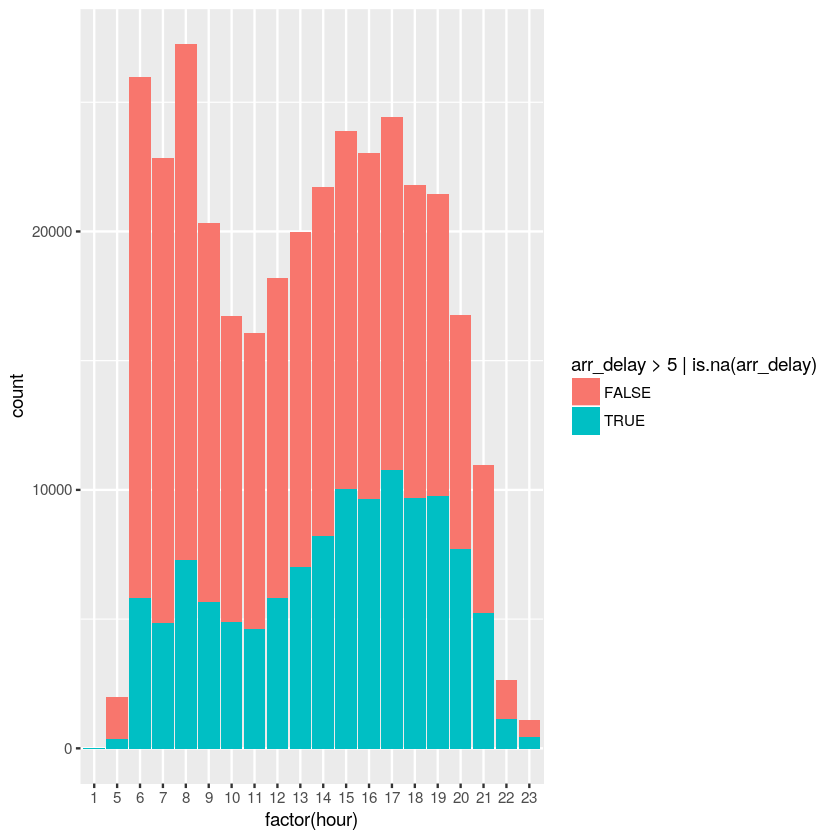

In [22]:
ggplot(flights, aes(x=factor(hour), fill= arr_delay >5 | is.na(arr_delay))) + geom_bar()